 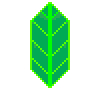
 
 # Folium Package
 
Folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map.

The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. folium supports both Image, Video, GeoJSON and TopoJSON overlays.

## Installation
Type in the commans prompt the following code:

conda install folium -c conda-forge

## What will we learn today?
1. How to display a map 
2. Map layers.
3. How to draw lines on a map.
4. How to draw circles on a map.
5. How to draw customized markers on a map
6. Applications.

In [1]:
import folium
import numpy as np
import pandas as pd


## 1. How to display a map 

folium.Map(location=None, width='100%', height='100%', left='0%', top='0%', position='relative', tiles='OpenStreetMap', attr=None, min_zoom=0, max_zoom=18, zoom_start=10, min_lat=-90, max_lat=90, min_lon=-180, max_lon=180)

In [2]:
# First map
first_map = folium.Map(location =[31, -95], zoom_start=5, width='100', height='100',
                       tiles='OpenStreetMap')

# display map
first_map

## 2. Map Layers

folium.raster_layers.TileLayer(tiles='OpenStreetMap', min_zoom=0, max_zoom=18)

In [3]:
# show map tiles using layer control

# map
map_Ecuador = folium.Map(location =[31, -96], zoom_start=5)

# add tiles to map
folium.raster_layers.TileLayer('Open Street Map').add_to(map_Ecuador)
folium.raster_layers.TileLayer('Stamen Terrain').add_to(map_Ecuador)
folium.raster_layers.TileLayer('Stamen Toner').add_to(map_Ecuador)
folium.raster_layers.TileLayer('Stamen Watercolor').add_to(map_Ecuador)
folium.raster_layers.TileLayer('CartoDB Positron').add_to(map_Ecuador)
folium.raster_layers.TileLayer('CartoDB Dark_Matter').add_to(map_Ecuador)

# add layer control to show different maps
folium.LayerControl(position= 'topright', collapsed = False).add_to(map_Ecuador)

# display map
map_Ecuador

## 3. How to draw lines on a map
folium.PolyLine()

In [4]:
lines_map = folium.Map(location=[31, -94], control_scale=True, zoom_start=6)

line_points1 = [(32.7767, -96.7970) ,(29.7604, -95.3698)]

folium.PolyLine(locations=line_points1, weight=3, color = 'blue').add_to(lines_map)

line_points2 = [(32.7767, -96.7970), (30.2672, -97.7431)]

folium.PolyLine(locations=line_points2, weight=3, color = 'red').add_to(lines_map)

line_points3 = [(30.93, -99.42), (30.93, -95.98), (29.03, -95.98), (29.03,-99.42), (30.93, -99.42)]

folium.PolyLine(locations=line_points3, weight=3, color = 'black').add_to(lines_map)

lines_map

## 4. How to draw circles on a map.
folium.Circle()

In [5]:
circles_map = folium.Map(location=[31, -94], control_scale=True, zoom_start=6)


folium.Circle(radius= 45000, location=[32.7767, -96.7970], color = 'blue').add_to(circles_map)


folium.Circle(radius= 90000, location=[30.2672, -97.7431], color = 'red', fill=True, fill_color='crimson').add_to(circles_map)

circles_map


## 5. How to draw customized markers on a map
CustomIcon()

folium.Marker()

In [6]:
from folium.features import CustomIcon

# Make an empty map
icon_map = folium.Map(location=[31, -94], zoom_start=7)
# Create marker and customize it befor including it
dallas = CustomIcon(icon_image = 'dallas.png', icon_size=(50, 50), icon_anchor=(22, 74), popup_anchor=(-3, -76))
tamu = CustomIcon(icon_image = 'TAMU.png', icon_size=(75, 55), icon_anchor=(40, 10), popup_anchor=(-3, -76))

# Define setting fot the marker to be included in the map
Dallas = folium.Marker(location=[32.7767, -96.7970], icon=dallas, popup='Dallas').add_to(icon_map)
Tamu = folium.Marker(location=[30.615220, -96.320502], icon=tamu, popup='Howdy').add_to(icon_map)

icon_map 

## 6. Aplications
### 6.1 Bubble map of COVID-19 cases per province in Ecuador

In [7]:
# Read CSV file in a data frame
df = pd.read_csv("COVID_Ecuador.csv", parse_dates = True) 
df

,Unnamed: 0,PROVINCE,LAT,LONG,DAY1,DAY2,DAY3,DAY4,DAY5,DAY6,DAY7,DAY8
0,1,AZUAY,-2.9001,-79.0059,1,14,28,94,99,116,154,200
1,2,BOLIVAR,-1.5912,-78.9990,0,2,9,20,26,30,33,33
2,3,CANAR,-2.7409,-78.8488,0,3,7,49,56,75,94,105
3,4,CARCHI,0.8151,-77.7166,0,0,0,6,9,15,23,26
4,5,CHIMBORAZO,-1.6650,-78.6589,0,2,11,17,31,54,65,90
5,6,COTOPAXI,-0.9316,-78.6058,0,0,1,9,16,30,36,45
6,7,EL ORO,-3.2581,-79.9554,0,1,14,52,56,97,149,183
7,8,ESMERALDAS,0.9682,-79.6517,0,0,3,10,14,27,31,44
8,9,GALAPAGOS,-0.8675,-89.4364,0,0,4,7,11,11,11,11
9,10,GUAYAS,-2.1894,-79.8891,19,187,826,1937,2402,3384,5290,5551


In [8]:
covid_cases = folium.Map(location =[-2, -83], zoom_start=6,  width='100%', height='100%',
                         tiles='CartoDB Dark_Matter', title="Your map title")

#for loop to get the coordinates and names of all the provinces
# we will separate each the data based on the index of the dataframe

# define variable for the daynumber:
CASE_DAY='DAY2'

for (index,data) in df.iterrows():
     
    if data.loc[CASE_DAY] > 50 :
        folium.Circle(radius=data.loc[CASE_DAY]*100, location=[data.loc['LAT'], data.loc['LONG']],
                 color='red', fill=True, fill_color='crimson', popup=data.loc[CASE_DAY]).add_to(covid_cases)
        
    elif data.loc[CASE_DAY] == 0 :
        folium.Circle(radius=data.loc[CASE_DAY]*100, location=[data.loc['LAT'], data.loc['LONG']],
                 color='green', fill=True, fill_color='green', popup=data.loc[CASE_DAY]).add_to(covid_cases)
  
    else:
        folium.Circle(radius=data.loc[CASE_DAY]*100, location=[data.loc['LAT'], data.loc['LONG']],
                 color='orange', fill=True, fill_color='coral', popup=data.loc[CASE_DAY]).add_to(covid_cases)
  
# Display Map
covid_cases



## 6. Aplications
### 6.2 Map with symbols for hospitals

In [9]:
from folium.features import CustomIcon


# Read CSV file of hospitals located in Guayaquil to a data frame
df_hosp = pd.read_csv('hospitals_gye.csv', index_col=[0]) 
df_hosp

,lat,lon,province,city,name,type,adress,max_capacity,current_patients
1,-2.2338,-79.8996,Guayas,Guayaquil,Hospital Jose Gregorio,Public,Guayaquil 090202,500,500
2,-2.2103,-79.8968,Guayas,Guayaquil,Centro Medico Serli,Private,"mz. 2236 solar 68, Calle 7, Guayaquil 090610",600,700
3,-2.2031,-79.8929,Guayas,Guayaquil,Hospital Francisco de Ycaza Bustamante,Public,"Av. Quito, Guayaquil 090315,",500,600
4,-2.2118,-79.8902,Guayas,Guayaquil,Fundacion Nahim Isaias,Public,"Lorenzo de Garaycoa 3808, Guayaquil 090101",500,600
5,-2.2082,-79.9264,Guayas,Guayaquil,Hospital Santa Marianita,Public,"Calle 34 South, Guayaquil 090417",300,400
6,-2.2693,-79.9029,Guayas,Guayaquil,Hospital Naval,Private,Guayaquil 090208,1000,800
7,-2.2321,-79.8977,Guayas,Guayaquil,Hospital Teodoro Maldonado Carbo,Public,"Av. 25 de Julio, Guayaquil 090203",600,50
8,-2.1855,-79.8804,Guayas,Guayaquil,Clinica Guayaquil,Private,"Calle 8 401, Guayaquil 090313",300,200
9,-2.1836,-79.8800,Guayas,Guayaquil,Hospital Luis Vernaza,Public,"Loja 700, Guayaquil 090313",800,300
10,-2.1739,-79.8804,Guayas,Guayaquil,Hospital de Solca,Public,"Avda. Pedro Menendez Gilbert, junto a la Cdla,...",900,500


In [10]:
Ecuador = folium.Map(location =[-2.15, -79.93], zoom_start=12,  width='100%', height='100%', 
                     tiles='OpenStreetMap')

#for loop to get the coordinates and names of all the provinces
# we will separate each the data based on the index of the dataframe

for (index,data) in df_hosp.iterrows():
    hospital = CustomIcon(icon_image = 'hosp.png', icon_size=(30, 30), icon_anchor=(0,0), popup_anchor=(-3, -3))
    
    folium.Marker(location=[data.loc['lat'], data.loc['lon']], icon=hospital, popup=data.loc['name']).add_to(Ecuador)  
    
# Display Map

Ecuador

In [12]:
hosp_map = folium.Map(location =[df_hosp['lat'].mean(), df_hosp['lon'].mean()], zoom_start=11,  
                     width='100%', height='100%', tiles='OpenStreetMap')

#for loop to get the coordinates and names of all the provinces
# we will separate each the data based on the index of the dataframe

for (index,data) in df_hosp.iterrows():
    
    if data.loc['current_patients']/data.loc['max_capacity'] >= 1:
        collapsed = CustomIcon(icon_image = 'collapsed.png', icon_size=(40, 40), icon_anchor=(0,0), popup_anchor=(-3, -3))
        folium.Marker(location=[data.loc['lat'], data.loc['lon']], icon=collapsed, popup=data.loc['name']).add_to(hosp_map)
    else:
        hosp = CustomIcon(icon_image = 'hosp.png', icon_size=(30, 30), icon_anchor=(0,0), popup_anchor=(-3, -3))
        folium.Marker(location=[data.loc['lat'], data.loc['lon']], icon=hosp, popup=data.loc['name']).add_to(hosp_map)
   
hosp_map.save('hospitals.html')

In [ ]:
folium.PolyLine?